# ❤️‍🔥 OKCupid User Segmentation 

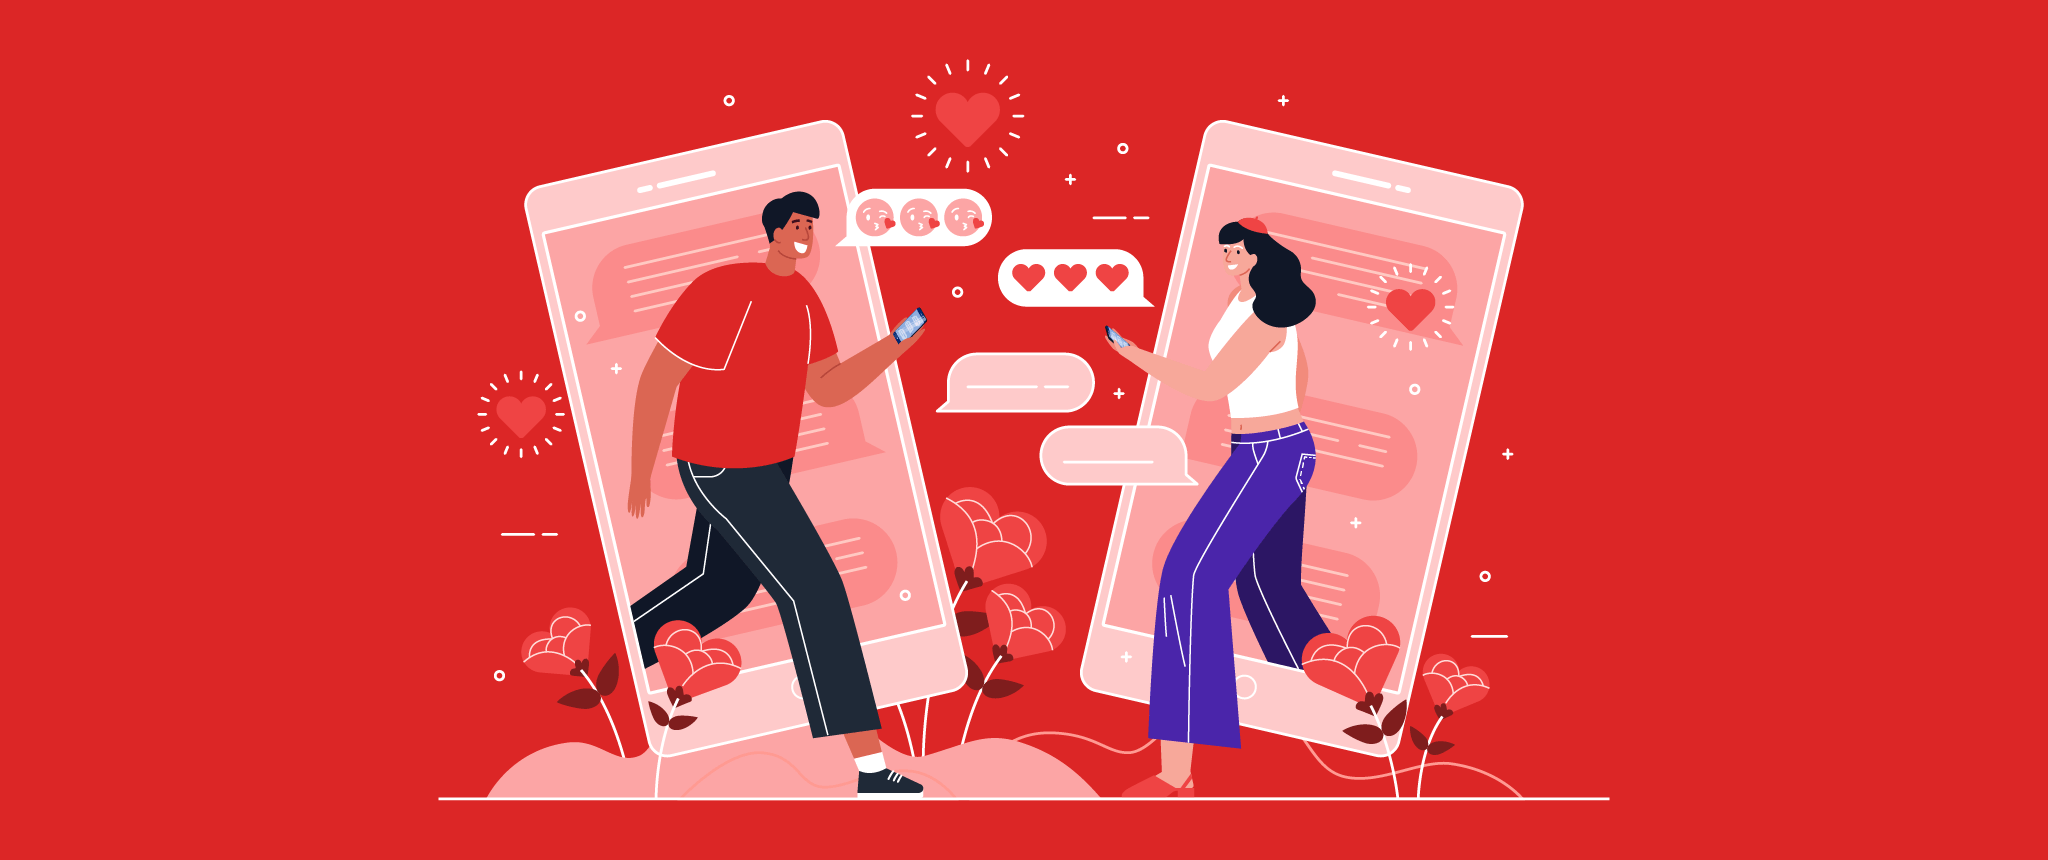

For our customer segmentation in this exercise, we will only take a few features into consideration:
- age 
- sex
- height
- income 
- drugs 
- smokes 

There are other creative features such as body type, but for now we will take basic but crucial ones that constitute the characters of OKCupid users.

One more, condition that we will consider beforehand is - only users who are SINGLE! 

## Data upload

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/딥러닝기초

/content/drive/MyDrive/딥러닝기초


In [3]:
import pandas as pd

df = pd.read_csv('./okcupid_profiles.csv')

In [4]:
df.status.unique()

array(['single', 'available', 'seeing someone', 'married', 'unknown'],
      dtype=object)

In [5]:
single_df = df[df['status']=='single']

In [6]:
single_df.head(2)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN


In [7]:
single_df = single_df[['age','sex','height','income','drugs','smokes']]
single_df.head(2)

,age,sex,height,income,drugs,smokes
0,22,m,75.0,-1,never,sometimes
1,35,m,70.0,80000,sometimes,no


In [8]:
single_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55697 entries, 0 to 59945
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     55697 non-null  int64  
 1   sex     55697 non-null  object 
 2   height  55694 non-null  float64
 3   income  55697 non-null  int64  
 4   drugs   42697 non-null  object 
 5   smokes  50459 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 3.0+ MB


- Age, sex and infome features have no missing values.
- Height has only 3 - we can replace them with average height value, depending on user's gender. 
- Drugs feature has many missing values.
- Smokes feature has some missing values.

In order to replace the missing values of drugs and smokes, maybe it might be helpful to do some data processing and see the correlation between the two features.

In [9]:
single_df.drugs.value_counts()

never        35650
sometimes     6677
often          370
Name: drugs, dtype: int64

In [10]:
single_df.smokes.value_counts()

no                40761
sometimes          3478
when drinking      2801
yes                2043
trying to quit     1376
Name: smokes, dtype: int64

We can convert the smokes feature into an ordinal feature. 

- If a user does not smoke at all, it will be 0.
- User smokes occasionally = 1.
- If a user answers as 'yes' = 2. 
- We will change missing values to -1, temporarily. 

## Data Preprocessing

In [11]:
#mapping smokes feature
def smoker_mapping(x):
  if x == 'no':
    x = 0
  elif x in ('sometimes','when driking','trying to quit'):
    x = 1
  elif x == 'yes':
    x = 2
  else: # if None
    x = -1 

  return x 

In [12]:
single_df['smokes'] = single_df.smokes.apply(lambda x: smoker_mapping(x))

In [13]:
single_df.smokes.value_counts()

 0    40761
-1     8039
 1     4854
 2     2043
Name: smokes, dtype: int64

We can also convert the drugs feature in a similar way! 

In [14]:
#mapping smokes feature
def drugs_mapping(x):
  if x == 'never':
    x = 0
  elif x == 'sometimes':
    x = 1
  elif x == 'often':
    x = 2
  else: # if None
    x = -1 

  return x 

In [15]:
single_df['drugs'] = single_df.drugs.apply(lambda x: drugs_mapping(x))

In [16]:
single_df.drugs.value_counts()

 0    35650
-1    13000
 1     6677
 2      370
Name: drugs, dtype: int64

In [17]:
# If the feature was meant to be a nominal feature, we could just use below code.
'''single_df['drugs']=single_df['drugs'].astype('category').cat.codes'''

"single_df['drugs']=single_df['drugs'].astype('category').cat.codes"

Oops, the code abov has turned 'sometimes' value to 2, and 'often' to 1. We want the opposite way. 

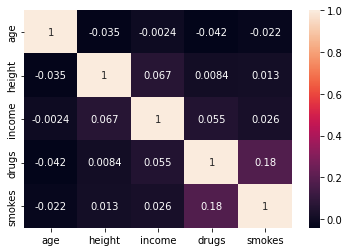

In [18]:
import seaborn as sns 

sns.heatmap(single_df.corr(), annot=True)

There is some kind of positive correlation between smoking and taking drugs. This implies: when you say yes to 'do you smoke?', you are more likely to take drugs often than not taking drugs at all.

Let's look a bit closer.

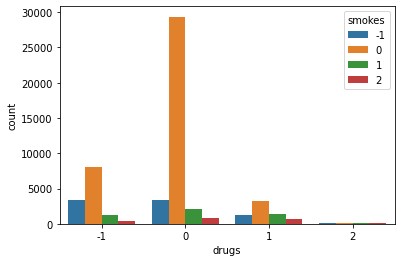

In [19]:
import matplotlib.pyplot as plt
 
# count plot on single categorical variable
sns.countplot(x ='drugs', hue = "smokes", data = single_df)
 
# Show the plot
plt.show()

It is now obvious that users who never take drugs,mostly don't smoke at all. 

Looking at the graph, there are only few users who take drugs. 

We can just simply replace the missing values in the 'drugs' feature with 0 (never take drugs), because ...
- the general fact about OKCupid users tells us that users (at least singles) mostly don't do drugs. 
- Users with missing values in the 'drugs' feature, mostly don't smoke. Since smoking and drugs have possible correlation, they are less likely to take drugs.

We will do the same for the 'smokes' feature.

In [20]:
single_df['drugs'] = single_df['drugs'].replace(-1, 0)
single_df['smokes'] = single_df['smokes'].replace(-1, 0)

In [21]:
single_df.describe()

,age,height,income,drugs,smokes
count,55697.000000,55694.000000,55697.000000,55697.000000,55697.000000
mean,32.371223,68.290714,19605.809433,0.133167,0.160511
std,9.517231,3.991638,95652.484069,0.358778,0.456193
min,18.000000,1.000000,-1.000000,0.000000,0.000000
25%,26.000000,66.000000,-1.000000,0.000000,0.000000
50%,30.000000,68.000000,-1.000000,0.000000,0.000000
75%,37.000000,71.000000,-1.000000,0.000000,0.000000
max,110.000000,95.000000,1000000.000000,2.000000,2.000000


You can see in the above table that minimum values of two features are 0, respectively.

In [22]:
single_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55697 entries, 0 to 59945
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     55697 non-null  int64  
 1   sex     55697 non-null  object 
 2   height  55694 non-null  float64
 3   income  55697 non-null  int64  
 4   drugs   55697 non-null  int64  
 5   smokes  55697 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.0+ MB


Now we only have height feature left to fill out the missing values. 

Like mentioned earlier, we will calculate the average height of female/male users  and replace the missing values with the average value.

In [23]:
single_df.groupby('sex')['height'].mean()

sex
f    65.090017
m    70.430968
Name: height, dtype: float64

In [24]:
single_df.loc[(single_df['sex']=='f') & df['height'].isna(), 'height'] = 65.1
single_df.loc[(single_df['sex']=='m') & df['height'].isna(), 'height'] = 70.4

In [25]:
single_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55697 entries, 0 to 59945
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     55697 non-null  int64  
 1   sex     55697 non-null  object 
 2   height  55697 non-null  float64
 3   income  55697 non-null  int64  
 4   drugs   55697 non-null  int64  
 5   smokes  55697 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 5.0+ MB


Let's look at other features, if there is no odd values, by looking at each distribution.

count    55697.000000
mean        32.371223
std          9.517231
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


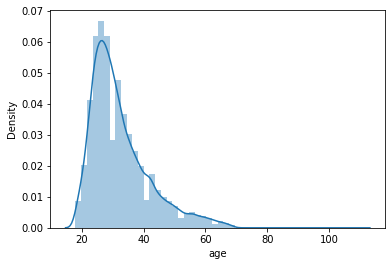

In [26]:
display(single_df.age.describe())
sns.distplot(single_df.age)

110 years old...? No way..! I mean love has no age limit.. But let's just remove it for our exercise ;)

In [27]:
q_hi  = single_df["age"].quantile(0.99)

single_df = single_df[(single_df["age"] < q_hi)]
single_df.head(2)

,age,sex,height,income,drugs,smokes
0,22,m,75.0,-1,0,1
1,35,m,70.0,80000,1,0


count    55101.000000
mean        68.301662
std          3.992938
min          1.000000
25%         66.000000
50%         68.000000
75%         71.000000
max         95.000000
Name: height, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


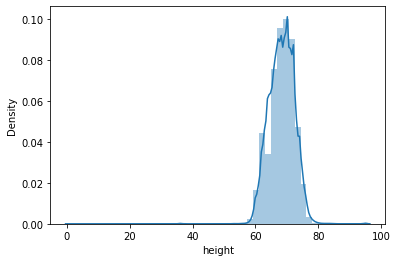

In [28]:
display(single_df.height.describe())
sns.distplot(single_df.height)

Looking at the distribution of height feature, we can find out that users are mostly between 160 and 180 meters high. 

This can be regarded as normal distribution, when we remove the outliers such as those with minimum value of 1 or maximum value of 100. 

The upper quantile gives us 76. But let's just change this manually to 90, because heights around 180cm are not very much like outliers. 

In [29]:
q_low = single_df["height"].quantile(0.01)
q_hi  = single_df["height"].quantile(0.99)

print(q_low,q_hi)

new_q_hi = q_hi+14

print(q_low,new_q_hi)

single_df = single_df[(single_df["height"] < q_hi) & (single_df["height"] > q_low)]
single_df.head(2)

60.0 76.0
60.0 90.0


,age,sex,height,income,drugs,smokes
0,22,m,75.0,-1,0,1
1,35,m,70.0,80000,1,0


count      52843.000000
mean       19391.726946
std        94953.286954
min           -1.000000
25%           -1.000000
50%           -1.000000
75%           -1.000000
max      1000000.000000
Name: income, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


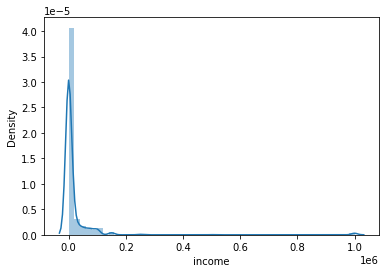

In [30]:
display(single_df.income.describe())
sns.distplot(single_df.income)

In the income feature, we can clearly see that there is also an outlier. Moreover it does not make sense that the income is a negative value (-1). This might refer to missing values. 

The distribution is heavily right-skewed. 

It will still be right-skewed without the outlier, but we can apply log2 to make it more like normal distribution. 

Thus, we will do two steps:
1. Remove (upper!) outliers
2. Replace missing values with the average income.

In [31]:
single_df["income"].value_counts()

-1          42973
 20000       2421
 100000      1420
 80000        969
 30000        908
 40000        886
 50000        856
 70000        625
 60000        624
 150000       561
 1000000      435
 250000       126
 500000        39
Name: income, dtype: int64

Wait... 

we thought the income feature has diverse income values in its interval. However, the value_counts above tells us that it has only couples of unique income values(!)

Maybe it might be a better idea to either categorize these values into 'income classes' or just leave them, rather than removing outliers. This might gives us better results than without outliers (If there are many so called 'outliers', this also means reducing the amount of information.)

We need to change our plans:
1. Replace missing values with the average income.
2. Categorize into income classes or leave them -> We will take the latter option.

In [32]:
'''upper_outliers = single_df["income"].quantile(0.99)
single_df[single_df["income"] > upper_outliers].income.value_counts()

single_df = single_df[single_df["income"] < upper_outliers]
single_df.head(2)
'''

'upper_outliers = single_df["income"].quantile(0.99)\nsingle_df[single_df["income"] > upper_outliers].income.value_counts()\n\nsingle_df = single_df[single_df["income"] < upper_outliers]\nsingle_df.head(2)\n'

In [33]:
average_income = single_df['income'].mean()
single_df['income'] = single_df['income'].replace(-1,average_income)

In [34]:
single_df['income'].describe()

count      52843.000000
mean       35162.286056
std        91986.800834
min        19391.726946
25%        19391.726946
50%        19391.726946
75%        19391.726946
max      1000000.000000
Name: income, dtype: float64

Hhmm... It seems like we are now more or less ready for the user segmentation :)

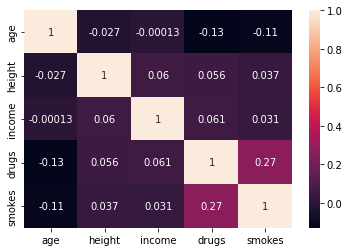

In [35]:
sns.heatmap(single_df.corr(), annot=True)

In [36]:
single_df['sex']=single_df['sex'].astype('category').cat.codes

## Feature relevance

In [37]:
# Source code from https://github.com/sushantdhumak/Creating-Customer-Segments/blob/master/Customer_Segments.ipynb
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Creating a list of features

features = list(single_df.columns)

# Using loop to go through every the feature in feature list

for feature in features:
    
    # Making a copy of the DataFrame, using the 'drop' function to drop the given feature
    
    new_data = single_df.drop([feature], axis = 1)

    # Splitting the data into training and testing sets(0.25) using the given feature as the target
    # Setting a random state.

    X_train, X_test, y_train, y_test = train_test_split(new_data, single_df[feature], test_size=0.25, random_state=42)

    # Creating a decision tree regressor and fit it to the training set

    regressor = DecisionTreeRegressor(random_state=63)
    regressor.fit(X_train, y_train)

    # Reporting the score of the prediction using the testing set
    
    from sklearn.metrics import r2_score
    
    score = r2_score(y_test, regressor.predict(X_test))
    
    print('R2 Score after removing {} : {}'.format(feature, score))

R2 Score after removing age : 0.03369421813421425
R2 Score after removing sex : 0.4181289621929156
R2 Score after removing height : 0.43683635739534943
R2 Score after removing income : -0.20137546612906365
R2 Score after removing drugs : -0.18522858625347727
R2 Score after removing smokes : -0.1741311986633065


We will shortly look at each distribution of the features in our new dataset.

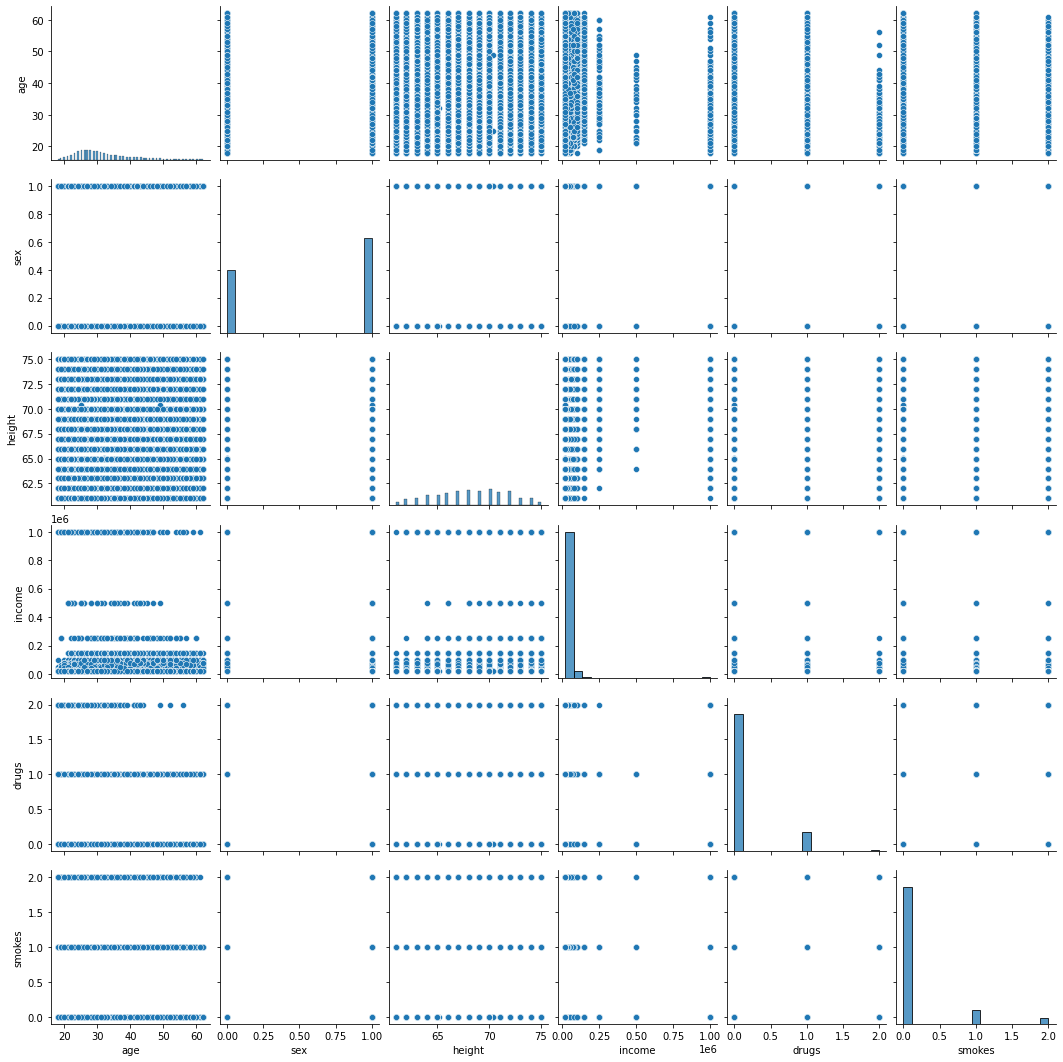

In [38]:
sns.pairplot(single_df)

## K-Means Clustering

In [39]:
single_df.reset_index(inplace=True, drop=True )
single_df.head()

,age,sex,height,income,drugs,smokes
0,22,1,75.0,19391.726946,0,1
1,35,1,70.0,80000.000000,1,0
2,23,1,71.0,20000.000000,0,0
3,29,1,66.0,19391.726946,0,0
4,29,1,67.0,19391.726946,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(single_df)

In [41]:
wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(df_scaled)            
  wcss_1.append(kmeans.inertia_)  

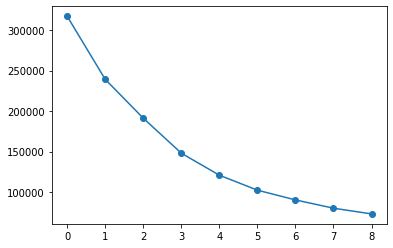

In [42]:
import plotly.express as px
%matplotlib inline

grafico = px.line(x = range(1,10), y = wcss_1)
plt.plot(wcss_1, '-o',)  
grafico.show()

In [43]:
kmeans = KMeans(n_clusters=3)           
kmeans.fit(df_scaled)         
labels = kmeans.labels_

In [44]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [single_df.columns])
cluster_centers

,age,sex,height,income,drugs,smokes
0,0.065934,-1.224214,-0.845842,-0.132106,-0.065831,-0.054602
1,-0.038724,0.808098,0.557437,-0.057292,0.033880,0.030249
2,-0.367538,0.390019,0.334385,10.476504,0.712413,0.435790


In [45]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [single_df.columns])
cluster_centers

,age,sex,height,income,drugs,smokes
0,32.618010,0.003680,65.317995,23010.380329,0.109263,0.136125
1,31.685215,0.998158,70.235820,29892.250430,0.144926,0.174877
2,28.754587,0.793578,69.454128,998853.211009,0.387615,0.360092


In [46]:
df_mk_cluster = pd.concat([single_df, pd.DataFrame({'cluster': labels})], axis = 1) 
df_mk_cluster.head()

,age,sex,height,income,drugs,smokes,cluster
0,22,1,75.0,19391.726946,0,1,1
1,35,1,70.0,80000.000000,1,0,1
2,23,1,71.0,20000.000000,0,0,1
3,29,1,66.0,19391.726946,0,0,1
4,29,1,67.0,19391.726946,0,0,1


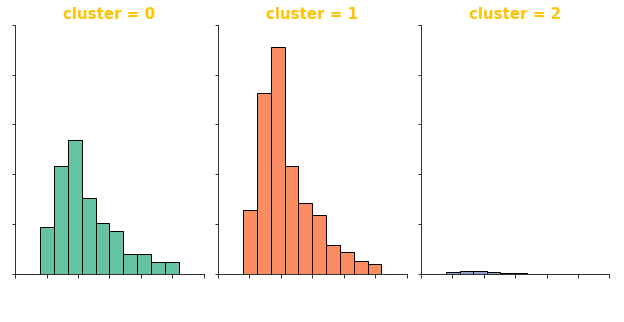

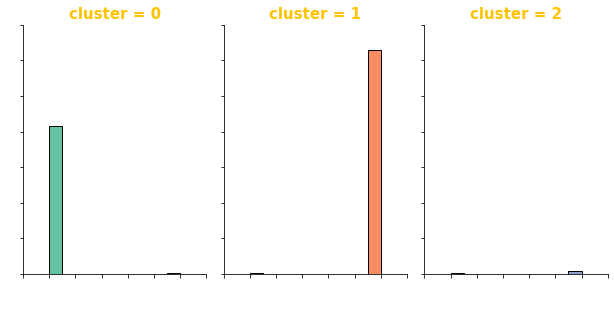

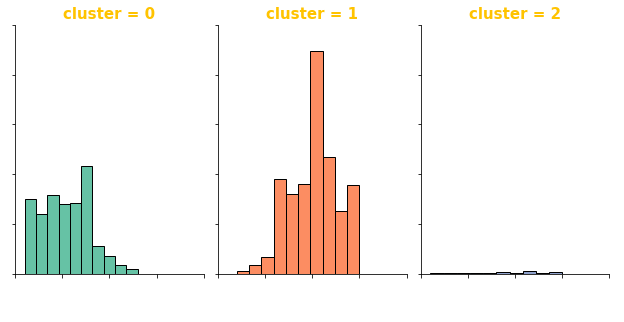

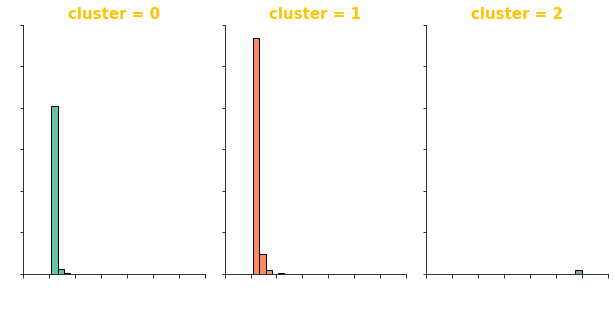

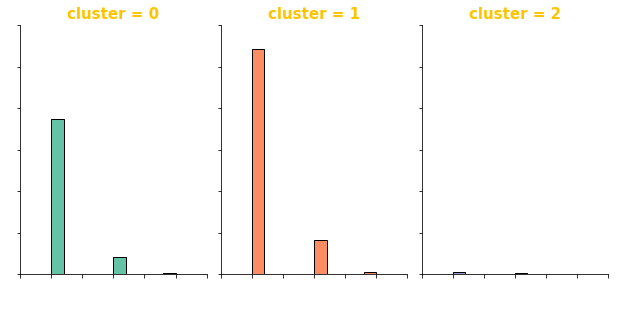

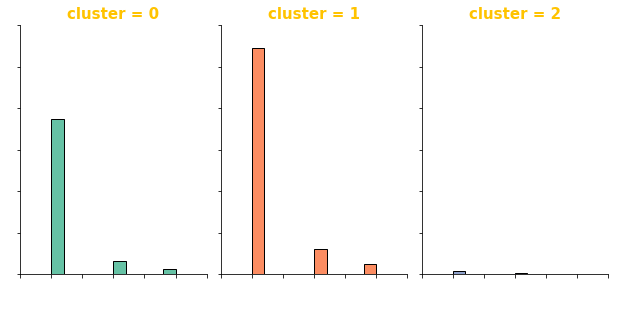

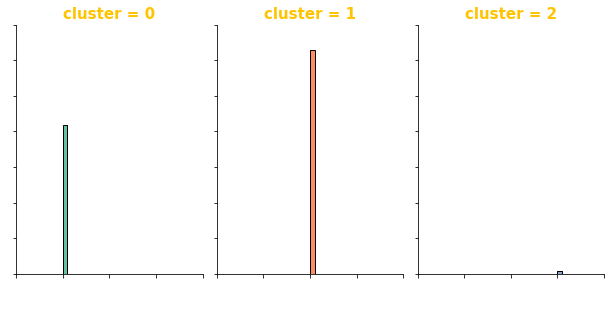

In [47]:
for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);